# Quiten Healthcare Project

### 01 - Import statements and Loading dataset

In [28]:
pip install nltk

Defaulting to user installation because normal site-packages is not writeable
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 2.2 MB/s eta 0:00:0000:0100:010m
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 291.0/291.0 kB 2.6 MB/s eta 0:00:00a 0:00:01

[notice] A new release of pip available: 22.2.2 -> 23.2.1
[notice] To update, run: /Library/Developer/CommandLineTools/usr/bin/python3 -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [63]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import nltk
import string
import seaborn as sns
from nltk.corpus import stopwords

In [64]:
# Loading dataset
df = pd.read_csv("data/raw_data_healthcare.csv")

# Adding the product and medication columns 
def add_product(row):
    str = row['medication'].lower()
    res = str.split("for ")
    if len(res[0]) == 0 :
        res[0] ='Not mentioned'
    return res[0]

def add_disease(row):
    str = row['medication'].lower()
    res = str.split("for ")
    return res[1]
df['product'] = df.apply(add_product, axis=1)
df['disease'] = df.apply(add_disease, axis=1)
df.drop(columns = ['medication'], inplace=True)

# Adding a less granular mapping of disease
disease_mapping = {
    "crohn's disease": "crohn",
    "ulcerative colitis": "ulcerative colitis",
    "rheumatoid arthritis": "rheumatoid arthritis",
    "multiple sclerosis": "multiple sclerosis",
    "ankylosing spondylitis": "ankylosing spondylitis",
    "psoriasis" : "psoriasis",
    "psoriatic arthritis" : "psoriasis",
    "crohn's disease, maintenance" : "crohn",
    "ulcerative colitis, maintenance" : "ulcerative colitis",
    "crohn's disease, acute" : "crohn",
    "plaque psoriasis" : "psoriasis"
}

def map_disease(disease):
    disease = disease.lower()
    for key, value in disease_mapping.items():
        if key in disease:
            return value
    return "others"
df['disease_category'] = df['disease'].apply(map_disease)

# Displaying the dataframe 
df.head()

,text_index,rate,comment,product,disease,disease_category
0,0,1.0,Insurance forced me to switch to inflectra due...,inflectra (infliximab),crohn's disease,crohn
1,1,NaN,My wife had RA from when she was a child. She ...,remicade (infliximab),rheumatoid arthritis,rheumatoid arthritis
2,2,1.0,This medication Remicade made me in constant p...,remicade (infliximab),ulcerative colitis,ulcerative colitis
3,3,1.0,"I have Fistulizing Crohn's, dx'd 6 yrs ago @ 3...",inflectra (infliximab),crohn's disease,crohn
4,4,10.0,Remicade literally gave me my life back 9 yrs ...,remicade (infliximab),ulcerative colitis,ulcerative colitis


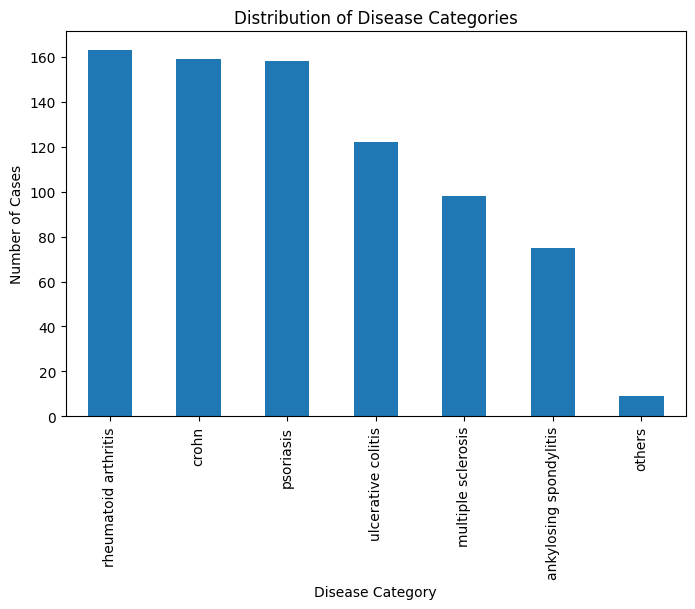

In [72]:
# Count the occurrences of each disease category
disease_counts = df["disease_category"].value_counts()
plt.figure(figsize=(8, 5))
disease_counts.plot(kind='bar')
plt.title("Distribution of Disease Categories")
plt.xlabel("Disease Category")
plt.ylabel("Number of Cases")
plt.show()

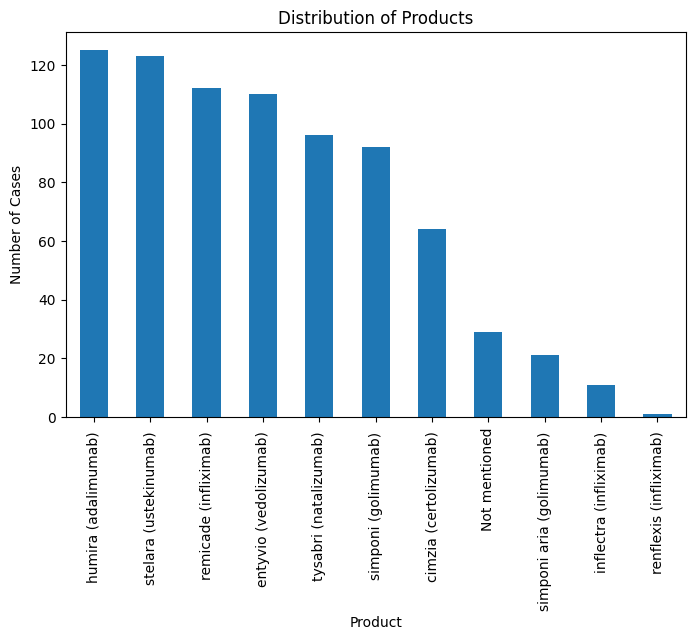

In [71]:
# Count the occurrences of each disease category
disease_counts = df["product"].value_counts()
plt.figure(figsize=(8, 5))
disease_counts.plot(kind='bar')
plt.title("Distribution of Products")
plt.xlabel("Product")
plt.ylabel("Number of Cases")

# Show the plot
plt.show()

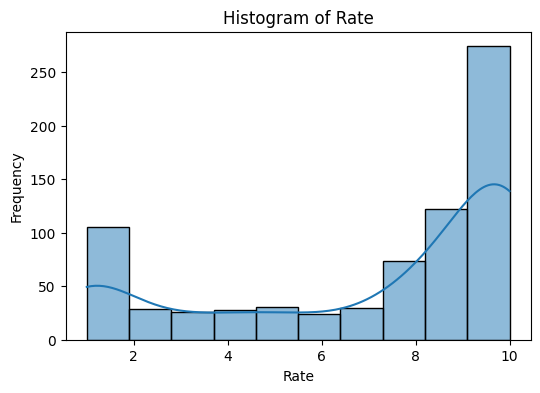

In [73]:
# Tracer l'histogramme de la variable "rate"
plt.figure(figsize=(6, 4))
sns.histplot(df['rate'], kde=True, bins=10)
plt.title("Histogram of Rate")
plt.xlabel("Rate")
plt.ylabel("Frequency")
plt.show()


### 02 - Cleaning the comments 

In [74]:
nltk.download('stopwords')

def clean_comment(row):
    # To clean the comments
    comment = row['comment'].lower() # Lower
    comment = ''.join([char for char in comment if char not in string.punctuation]) # Delete ponctuation
    words = comment.split() # Split comment into words 
    stop_words = set(stopwords.words('english')) 
    words = [word for word in words if word not in stop_words] # Delete stop words (english)
    cleaned_comment = ' '.join(words) # Join words in one cleaned comment
    return cleaned_comment

df['cleaned_comment'] = df.apply(clean_comment, axis=1)

df.head()

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/vitrac/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


,text_index,rate,comment,product,disease,disease_category,cleaned_comment
0,0,1.0,Insurance forced me to switch to inflectra due...,inflectra (infliximab),crohn's disease,crohn,insurance forced switch inflectra due cheaper ...
1,1,NaN,My wife had RA from when she was a child. She ...,remicade (infliximab),rheumatoid arthritis,rheumatoid arthritis,wife ra child used normal meds till remicade j...
2,2,1.0,This medication Remicade made me in constant p...,remicade (infliximab),ulcerative colitis,ulcerative colitis,medication remicade made constant pain slept t...
3,3,1.0,"I have Fistulizing Crohn's, dx'd 6 yrs ago @ 3...",inflectra (infliximab),crohn's disease,crohn,fistulizing crohns dxd 6 yrs ago 36yo 11 surge...
4,4,10.0,Remicade literally gave me my life back 9 yrs ...,remicade (infliximab),ulcerative colitis,ulcerative colitis,remicade literally gave life back 9 yrs ago il...
